In [1]:
import cv2
import matplotlib.pyplot as plt
import statistics
import numpy as np
import math

In [2]:
#cameraID=0
#webcam=cv2.VideoCapture(cameraID)

In [3]:
#Функции для работы с изображением
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
def clampInt8(value):
    if(value<0):
        return 0
    elif(value>255):
        return 255
    else:
        return value
def minus_middle(image):
    brightness_array=[]
    rows,cols = image.shape
    for i in range(rows):
        for j in range(cols):
            brightness_array.append(image[i,j])
            #k=image[i,j]
            #print(k)
            #break
        #break
    
    brightness_array.sort()
    #print(brightness_array)
    median_Brightness=statistics.median(brightness_array)
    img=image.copy()
    for i in range(rows):
        for j in range(cols):
            img[i][j]=clampInt8(img[i][j]-median_Brightness)
    return img

def go_to_max(image):
    brightness_array=[]
    rows,cols = image.shape
    for i in range(rows):
        for j in range(cols):
            brightness_array.append(image[i,j])
            #k=image[i,j]
            #print(k)
            #break
        #break
    
    brightness_array.sort()
    #print(brightness_array)
    img=image.copy()
    median_Brightness=statistics.median(brightness_array)
    max_Brightness=0
    for i in range(rows):
        for j in range(cols):
            v=img[i][j]
            if(v>max_Brightness):
                max_Brightness=v
    normalization_coefficient=1
    if(max_Brightness>0):
        normalization_coefficient=255/max_Brightness
    
    for i in range(rows):
        for j in range(cols):
            if(img[i][j]>median_Brightness):
                img[i][j]*=normalization_coefficient
                #img[i][j]=255
    return img

#Проверка, что нету никакого большего размером прямоугольника
def IsInsideBigger(idx,x2, y2, w2, h2,contours):
    '''OutLineSizeX=2
    OutLineSizeY=10
    x-=w*OutLineSizeX/2
    y-=h*OutLineSizeY/2
    w+=w*OutLineSizeX
    h+=h*OutLineSizeY'''
    for idx2, contour in enumerate(contours):
        #if(idx2!=idx):
            (x, y, w, h) = cv2.boundingRect(contour)
            if(x2>x and x2+w2<x+w and y2>y and y2+h2<y+h):
                return True
    return False

In [6]:
import numpy as np
use_Maximization=True
'''widthDivHeight_min=0.35
widthDivHeight_max=1.1
medianDownSize=0.35
medianUpSize=2'''
ImageOutlineSize=0.3
out_size=28
#from 67x178
#to 102x110
stop=False
while stop==False:
    frame=cv2.imread("ToSegment4.jpg")
    
    #ret,frame=webcam.read()
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(3,3),2)
    
    img=adjust_gamma(blur,50)
    
    cv2.imshow("frame", frame)
    
    cv2.imshow("adjust_gamma", img)
    
    #cv2.imshow("blur", blur)
    img_erode = cv2.erode(img, np.ones((2, 2), np.uint8), iterations=1)
    #cv2.imshow("img_erode", img_erode)
    invertedImage = cv2.bitwise_not(img_erode)
    #cv2.imshow("invertedImage", invertedImage)
    
    img_minus_middle=minus_middle(invertedImage)
    
    adjust_gamma2=adjust_gamma(img_minus_middle,5)
    
    cv2.imshow("adjust_gamma2", adjust_gamma2)
    
    to_max=go_to_max(adjust_gamma2)
    
    cv2.imshow("to_max", to_max)
    
    
    
    #plt.hist(img.ravel(),256)
    #plt.show()
    

    output = frame.copy()
    
    contours, hierarchy = cv2.findContours(to_max, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = to_max.copy()
    
    '''Areas=[]
    Widths=[]
    Heights=[]
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        Areas.append(w*h)
        Widths.append(w)
        Heights.append(h)
    Areas.sort()
    Widths.sort()
    Heights.sort()
    #print(Areas)
    
    
    medianArea=statistics.median(Areas)
    medianWidth=statistics.median(Widths)
    medianHeight=statistics.median(Heights)'''
    #print(medianArea)

    minusSize=int(out_size*ImageOutlineSize)
    minusHalfSize=int(minusSize/2)
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        size=w*h
        #if(size>medianArea*medianDownSize and size<medianArea*medianUpSize and w<h*VerticalAndHorizontalPower):
        #print(medianArea*medianDownSize,medianArea*medianUpSize,size)
        #if(size>medianArea*medianDownSize and size<medianArea*medianUpSize):
        
        #if(not IsInsideBigger(idx,x,y,w,h,contours) and w>=medianWidth*medianDownSize and h>=medianHeight*medianDownSize and w<medianWidth*medianUpSize and h<medianHeight*medianUpSize and (w/h<widthDivHeight_max)and (w/h>widthDivHeight_min)):
        #if(size>medianArea):
        if not IsInsideBigger(idx,x,y,w,h,contours):
            #print("OK")
            cv2.rectangle(output, (x, y), (x + w, y + h), (100, 0, 0), 1)
    cv2.imshow("output", output)
    
    #break
    key=cv2.waitKey(0)
    if(key==ord("q")):
                stop=True


cv2.destroyAllWindows()





After gamma correction 2


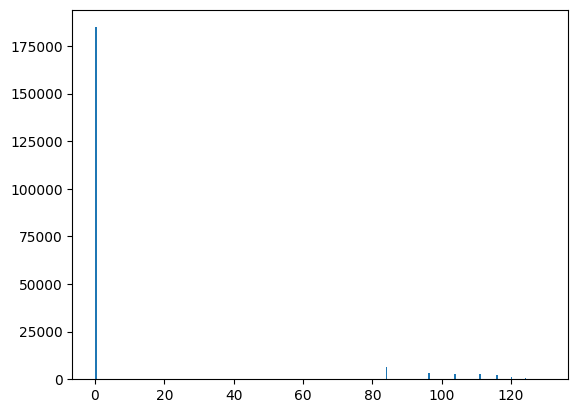

After Maximization


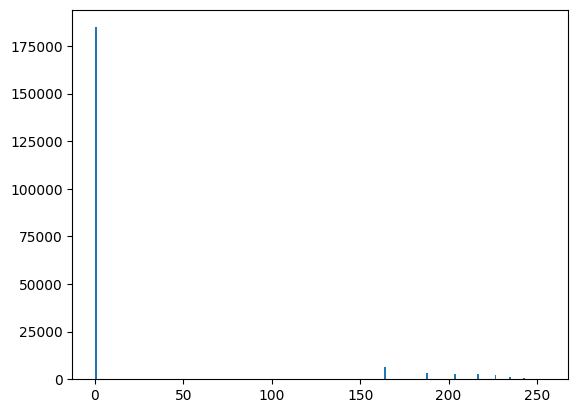

From=12 114 49 43
(49, 49)


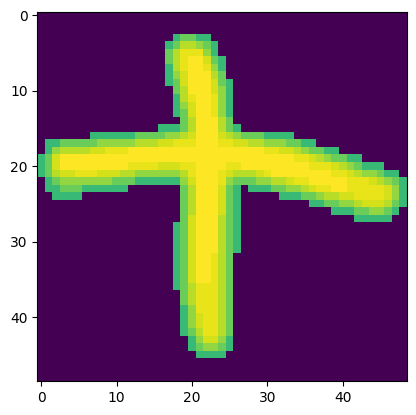

(20, 20)
(28, 28)
From=792 108 40 9
(40, 40)


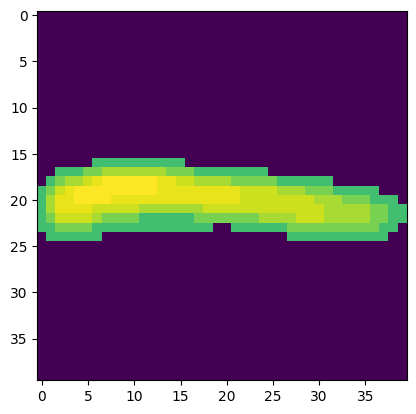

(20, 20)
(28, 28)
From=598 97 38 13
(38, 38)


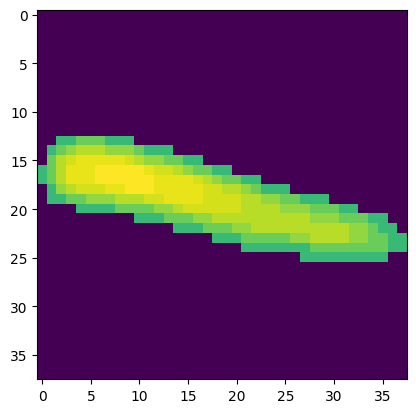

(20, 20)
(28, 28)
From=266 74 33 94
(94, 94)


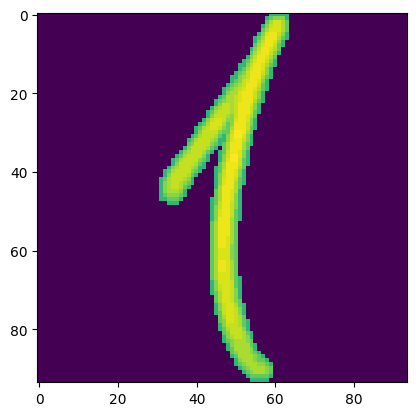

(20, 20)
(28, 28)
From=716 73 69 64
(69, 69)


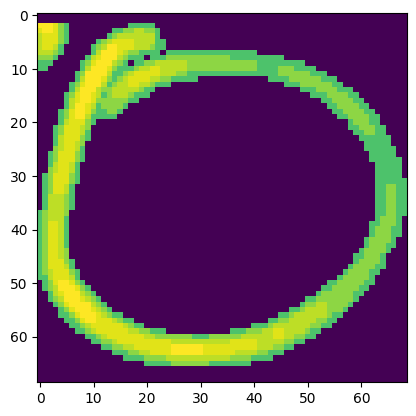

(20, 20)
(28, 28)
From=857 71 54 72
(72, 72)


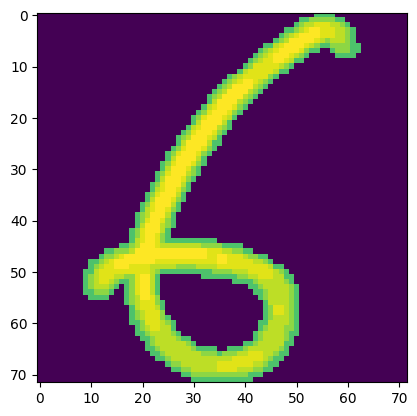

(20, 20)
(28, 28)
From=657 69 65 75
(75, 75)


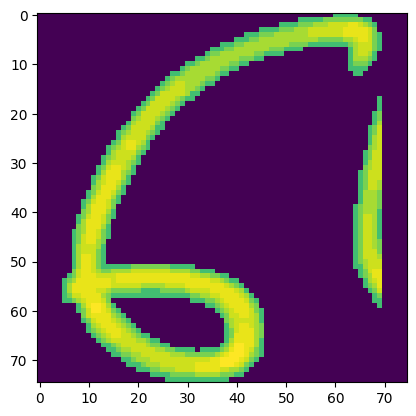

(20, 20)
(28, 28)
From=557 68 39 76
(76, 76)


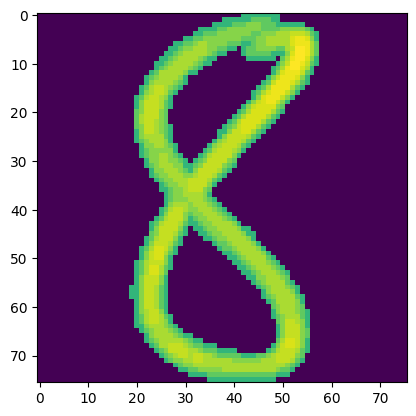

(20, 20)
(28, 28)
From=210 67 42 102
(102, 102)


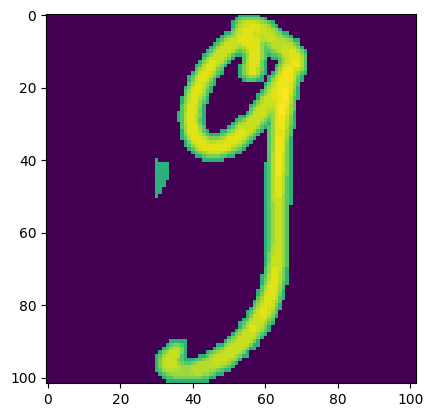

(20, 20)
(28, 28)
From=89 65 43 117
(117, 117)


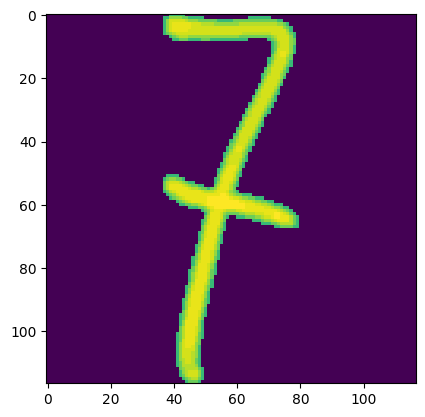

(20, 20)
(28, 28)
From=921 64 84 87
(87, 87)


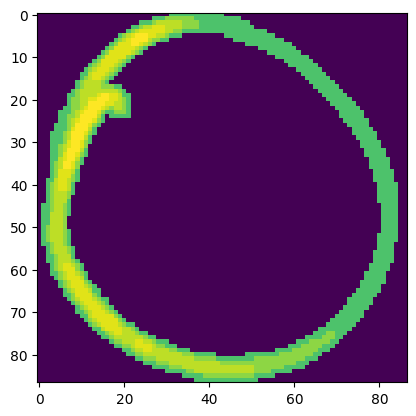

(20, 20)
(28, 28)
From=506 62 50 94
(94, 94)


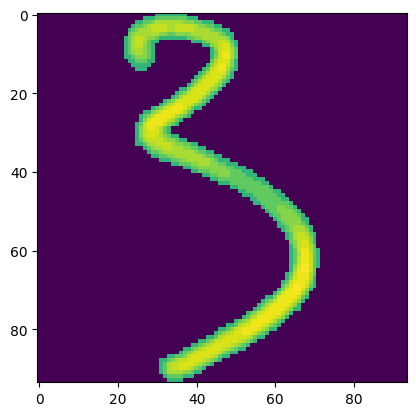

(20, 20)
(28, 28)
From=316 62 43 90
(90, 90)


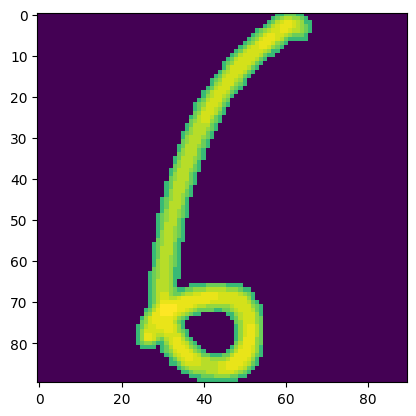

(20, 20)
(28, 28)
From=432 60 52 101
(101, 101)


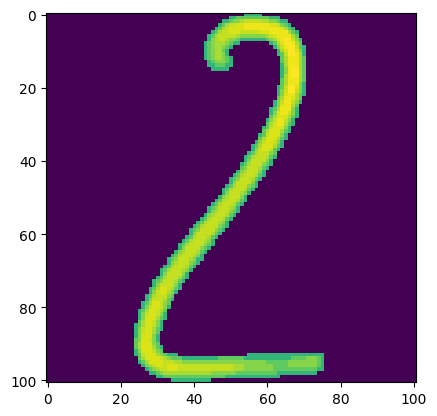

(20, 20)
(28, 28)
From=145 34 69 153
(153, 153)


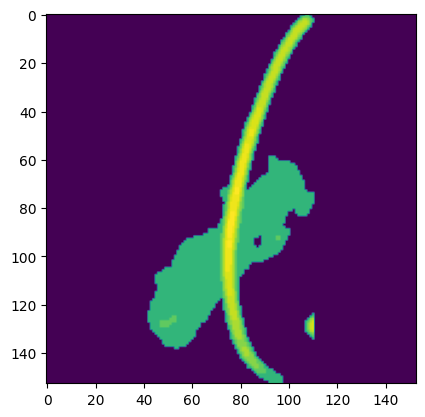

(20, 20)
(28, 28)
From=361 17 35 141
(141, 141)


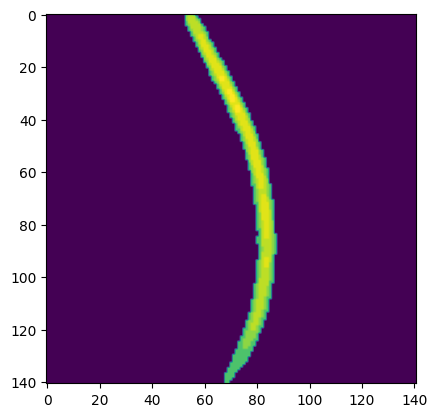

(20, 20)
(28, 28)
12
89
145
210
266
316
361
432
506
557
598
657
716
792
857
921


In [5]:
import numpy as np

use_Maximization=True
'''widthDivHeight=0.8
medianDownSize=0.6
medianUpSize=2'''
ImageOutlineSize=0.3
def letters_extract(image_file, out_size=28):
    '''img = cv2.imread(image_file)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_erode = cv2.erode(thresh, np.ones((10, 10), np.uint8), iterations=1)
    invertedImage = cv2.bitwise_not(img_erode)'''
    readed_image = cv2.imread(image_file)
    gray=cv2.cvtColor(readed_image,cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray,(3,3),2)
    
    img=adjust_gamma(blur,50)
    img_erode = cv2.erode(img, np.ones((2, 2), np.uint8), iterations=1)
    invertedImage = cv2.bitwise_not(img_erode)
    
    img_minus_middle=minus_middle(invertedImage)
    
    adjust_gamma2=adjust_gamma(img_minus_middle,5)
    
    #img_minus_middle=minus_middle(adjust_gamma2)
    
    #adjust_gamma2=adjust_gamma(img_minus_middle,5)
    

    print("After gamma correction 2")
    plt.hist(adjust_gamma2.ravel(),256)
    plt.show()
    to_max=adjust_gamma2
    if(use_Maximization):
        to_max=go_to_max(adjust_gamma2)
        print("After Maximization")
        plt.hist(to_max.ravel(),256)
        plt.show()
    
    # Get contours
    contours, hierarchy = cv2.findContours(to_max, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

    output = to_max.copy()

    letters = []
    
    '''Areas=[]
    Widths=[]
    Heights=[]
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        Areas.append(w*h)
        Widths.append(w)
        Heights.append(h)
    Areas.sort()
    Widths.sort()
    Heights.sort()
    #print(Areas)
    
    
    medianArea=statistics.median(Areas)
    medianWidth=statistics.median(Widths)
    medianHeight=statistics.median(Heights)'''
    #print(medianArea)

    minusSize=int(out_size*ImageOutlineSize)
    minusHalfSize=int(minusSize/2)
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        size=w*h
        
        #print("medianArea*medianDownSize="+str(medianArea*medianDownSize)+"medianArea*medianUpSize="+str(medianArea*medianUpSize)+" Size="+str(size))
        #print(medianArea*medianDownSize,medianArea*medianUpSize,size)
        #if(size>medianArea*medianDownSize and h>w*1.1):
        #if(w>=medianWidth*medianDownSize and h>=medianHeight*medianDownSize and w<medianWidth*medianUpSize and h<medianHeight*medianUpSize and (w/h<widthDivHeight)):
        if not IsInsideBigger(idx,x,y,w,h,contours):
        #if( True):
            print("From="+str(x)+" "+str(y)+" "+str(w)+" "+str(h))
            '''h_Outline=int(h*ImageOutlineSize)
            w_Outline=int(w*ImageOutlineSize)

            if(x-w_Outline<0):
                w_Outline=x
            if(y-h_Outline<0):
                h_Outline=y

            x-=w_Outline
            w+=w_Outline*2
            y-=h_Outline
            h+=h_Outline*2'''
            #print("To="+str(x)+" "+str(y)+" "+str(w)+" "+str(h))

            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = to_max[y:y + h, x:x + w]
            # print(letter_crop.shape)

            # Resize letter canvas to square
            size_max = max(w, h)
            letter_square = 255 * np.zeros(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Enlarge image top-bottom
                # ------
                # ======
                # ------
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Enlarge image left-right
                # --||--
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop

            print(letter_square.shape)

            plt.imshow(letter_square)
            plt.show()

            res = cv2.resize(letter_square, dsize=(out_size-minusSize, out_size-minusSize), interpolation=cv2.INTER_CUBIC)
            print(res.shape)
            letter_square=np.zeros((out_size,out_size))
            #plt



            for y_pos in range(res.shape[0]):
                for x_pos in range(res.shape[1]):
                    letter_square[y_pos+minusHalfSize][x_pos+minusHalfSize]=res[y_pos][x_pos]

            # Resize letter to 28x28 and add letter and its X-coordinate
            #letters.append((x, w, cv2.resize(letter_square, (out_size, out_size), interpolation=cv2.INTER_AREA)))
            
            letter_square = cv2.dilate(letter_square, np.ones((2, 2), np.uint8), iterations=1)
            
            print(letter_square.shape)
            letters.append((x,w,letter_square))

    # Sort array in place by X-coordinate
    letters.sort(key=lambda x: x[0], reverse=False)

    return letters

from PIL import Image
letters=letters_extract("ToSegment3.jpg",28)
for i in range(len(letters)):
    print(letters[i][0])
    im = Image.fromarray(letters[i][2]).convert('RGB')
    im.save(str(i)+".png")